## Install Python 3.8

See [stackoverflow](https://stackoverflow.com/a/70993829)

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh

!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh

!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
!conda install python=3.8

In [ ]:
!python --version

Python 3.8.19


## Install forceatlas2

In [ ]:
!git clone https://github.com/bhargavchippada/forceatlas2.git

Cloning into 'forceatlas2'...
remote: Enumerating objects: 232, done.
remote: Total 232 (delta 0), reused 0 (delta 0), pack-reused 232
Receiving objects: 100% (232/232), 741.79 KiB | 8.94 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [ ]:
%cd forceatlas2
%ls -lrth

/content/forceatlas2
total 82M
-rwxr-xr-x 1 root root  82M Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh*
-rw-r--r-- 1 root root 6.7K Apr 11 09:43 README.md
-rw-r--r-- 1 root root   64 Apr 11 09:43 MANIFEST.in
-rw-r--r-- 1 root root  35K Apr 11 09:43 LICENSE
drwxr-xr-x 2 root root 4.0K Apr 11 09:43 examples/
-rw-r--r-- 1 root root 2.7K Apr 11 09:43 setup.py
drwxr-xr-x 5 root root 4.0K Apr 11 09:46 build/
drwxr-xr-x 3 root root 4.0K Apr 11 09:47 fa2/
-rw-r--r-- 1 root root 195K Apr 11 09:54 latentStates.npz
-rw-r--r-- 1 root root 2.3K Apr 11 10:26 uniqueStates.npz
-rw-r--r-- 1 root root 121K Apr 11 10:26 obsKeys.npz
drwxr-xr-x 2 root root 4.0K Apr 11 11:20 fa2.egg-info/


In [ ]:
!pip install . --user

Processing /content/forceatlas2
  Preparing metadata (setup.py) ... done
  Created wheel for fa2: filename=fa2-0.3.5-cp38-cp38-linux_x86_64.whl size=409763 sha256=7381b74680034d59e8abfac53822896088f1fb5756032850659939cd3284154f
  Stored in directory: /tmp/pip-ephem-wheel-cache-b0ezsera/wheels/fb/a7/7c/b4b25f60e7779bc83e657a564c2383c150b2143f731e98711e
Successfully built fa2
  Attempting uninstall: fa2
    Found existing installation: fa2 0.3.5
    Uninstalling fa2-0.3.5:
      Successfully uninstalled fa2-0.3.5


In [ ]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

G = nx.random_geometric_graph(400, 0.2)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

# positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

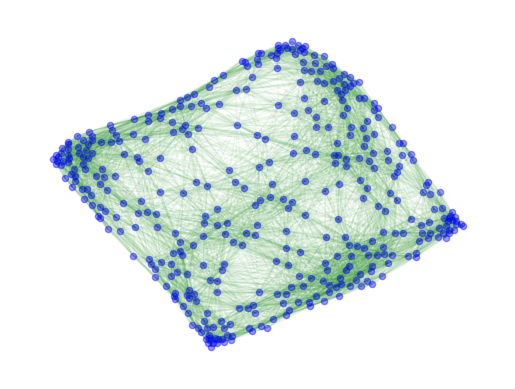

In [ ]:
# nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
# nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
# plt.axis('off')
# plt.show()

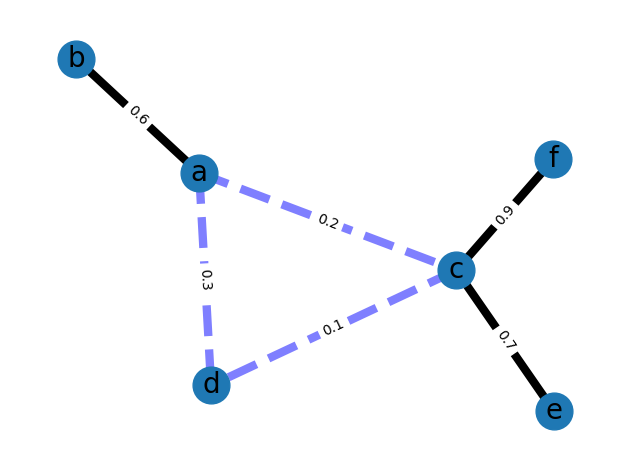

In [ ]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from scipy.io import loadmat

In [ ]:
latent_states = np.load('latentStates.npz')
unique_states = np.load('uniqueStates.npz')
obs_keys = np.load('obsKeys.npz')

In [ ]:
inferredStates = latent_states['inferredStates']
uniqueStates = unique_states['uniqueStates']
obsKeys = obs_keys['obsKeys']

manualStates = inferredStates[:, 1]
latentStates = inferredStates[:, 0]

nLS = uniqueStates.shape[0]
LS = [f"LS-{i+1}" for i in range(nLS)]

In [ ]:
inferredStates.shape, uniqueStates.shape, manualStates.shape, latentStates.shape, obsKeys.shape

((3072, 2), (24, 23), (3072,), (3072,), (3072, 5))

A state-transition graph in which nodes have been clustered according to the transition probabilities. Nodes correspond to the substages, and edges identify the transitions between stages. Nodes’ size is related to their in-degree. Blue, green, and red nodes are associated with substages mapping with high probability to wakefulness, NREM sleep, and REM sleep, respectively. Purple nodes correspond to substages that do not have a clear mapping to 1 of the 3 known stages (probability lower than 0.6 for any stage). Edges’ weight is related to the corresponding transition probability, and their color is related to the source node.

See [graph](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.2003663).

See [networkx examples](https://networkx.org/documentation/stable/auto_examples/index.html).

In [ ]:
# Example list of transitions between states
# Transitions = [‘A’, ‘B’, ‘B’, ‘C’, ‘B’, ‘A’, ‘D’, ‘D’, ‘A’, ‘B’, ‘A’, ‘D’]
# Function to calculate the transition matrix
def transition_matrix(transitions):
    # Identify the unique states
    states = sorted(set(transitions))
    # Create a dictionary to map states to indices
    state_indices = {state: i for i, state in enumerate(states)}
    # Initialize the transition matrix with zeros
    num_states = len(states)
    M = np.zeros((num_states, num_states))
    # Populate the transition counts
    for (i, j) in zip(transitions, transitions[1:]):
        M[state_indices[i]][state_indices[j]] += 1
    # Convert counts to probabilities
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

# Calculate the transition matrix
M = transition_matrix(latentStates)
# Print the transition matrix
# print("Transition Probability Matrix:")
# print(M)

# plt.imshow(M, origin='lower')
# plt.colorbar()

G = nx.from_numpy_array(np.array(M))
# nx.draw(G, with_labels=True)

In [ ]:
M.shape

(24, 24)

In [ ]:
M

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.66666667e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.33333333e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e-01,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00, 4.00000000e-01,
        0.00000000e+00, 2.00000000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.66666667e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

In [ ]:
# colors = ['red is rem', '', 'blue is wake']

node_colors = []

for i in uniqueStates[:, 0]:

    idx = np.where(obsKeys[:, 1] == i )[0]
    latent_frames = obsKeys[idx, :]

    awake_pct = round((len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames))),3)
    nrem_pct = round((len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames))),3)
    rem_pct = round((len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames))),3)

    print(awake_pct, nrem_pct, rem_pct, LS[i])
    if nrem_pct > awake_pct and nrem_pct > rem_pct: # nrem is green
        print("nrem")
        node_colors.append("green")
    elif awake_pct > nrem_pct and awake_pct > rem_pct: # awake is blue
        print("awake")
        node_colors.append("blue")
    else: # rem is red
        print("rem")
        node_colors.append("purple")

0.333 0.667 0.0 LS-1
nrem
0.3 0.5 0.2 LS-2
nrem
0.733 0.067 0.133 LS-3
awake
0.0 1.0 0.0 LS-4
nrem
0.0 1.0 0.0 LS-5
nrem
0.0 1.0 0.0 LS-6
nrem
0.5 0.4 0.1 LS-7
awake
0.393 0.477 0.056 LS-8
nrem
0.0 1.0 0.0 LS-9
nrem
0.5 0.5 0.0 LS-10
rem
0.0 1.0 0.0 LS-11
nrem
0.0 1.0 0.0 LS-12
nrem
0.403 0.429 0.034 LS-13
nrem
0.0 1.0 0.0 LS-14
nrem
0.333 0.0 0.667 LS-15
rem
0.319 0.381 0.257 LS-16
nrem
1.0 0.0 0.0 LS-17
awake
0.527 0.175 0.245 LS-18
awake
0.206 0.706 0.088 LS-19
nrem
0.154 0.761 0.081 LS-20
nrem
1.0 0.0 0.0 LS-21
awake
0.333 0.507 0.022 LS-22
nrem
0.385 0.577 0.0 LS-23
nrem
0.263 0.642 0.047 LS-24
nrem


In [ ]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:02<00:00, 840.90it/s]

BarnesHut Approximation  took  0.43  seconds
Repulsion forces  took  1.37  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.23  seconds
AdjustSpeedAndApplyForces step  took  0.20  seconds


In [ ]:
in_degrees = dict(G.degree())

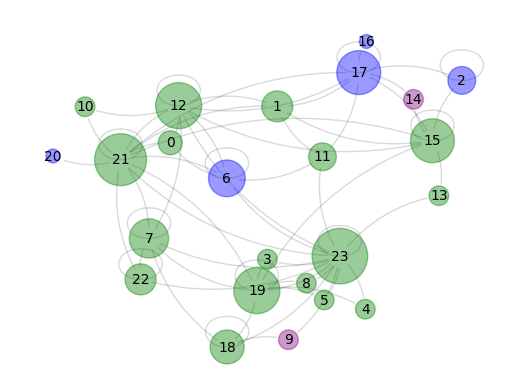

In [ ]:
nx.draw_networkx_nodes(G, positions,
                       node_size=[v*100 for v in in_degrees.values()],
                       node_color=node_colors,
                       alpha=0.4,)
nx.draw_networkx_edges(G, positions,
                       connectionstyle="arc3,rad=0.2",
                       edge_color="black",
                       alpha=0.15,
                       arrows=True)
nx.draw_networkx_labels(G, positions, font_size=10, font_family="sans-serif")
plt.axis('off')
plt.show()